# World Happiness Report

As per the Project Description

Happiness Score is calculated basd on Economy, Family, Health, Freedom, Trust, Generosity and Dytopia Residual.

In [1]:
import pandas as pd
WHR=pd.read_csv("happiness_score_dataset.csv",sep=",") #reading happiness_score_dataset.csv file
WHR

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [2]:
WHR.head() #Looking into top 5 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
WHR.shape #Checking the shape of our data

(158, 12)

We have 12 attributes and 158 rows in our dataframe

In [4]:
WHR_new=WHR.iloc[:,3:] #As per problem statement we don't country, Region, Rank and Standard error
WHR_new=WHR_new.drop(['Standard Error'],axis=1)

In [5]:
WHR_new.head() #Looking into top 5 rows

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Identify the type of problem

In [6]:
WHR_new.dtypes #Checking the datatype of each attribute

Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Target variable i.e. Happiness Score is float64 i.e. continuous so we'll use Regression to learn our model.

## EDA

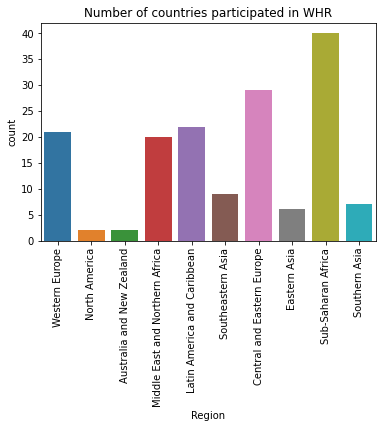

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
#Univariate Analysis
ax=sns.countplot(x='Region',data=WHR)
plt.title('Number of countries participated in WHR')
plt.xticks(rotation=90)
plt.show()

Sub-Sahran Africa Region is higly participated Region.

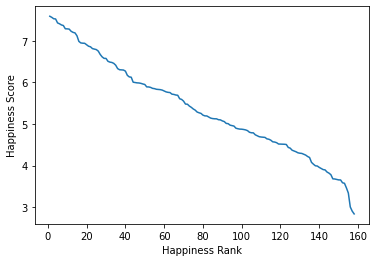

In [8]:
#Bivariate Analysis
plt.plot(WHR.iloc[:,2:3],WHR.iloc[:,3:4])
plt.xlabel('Happiness Rank') 
plt.ylabel('Happiness Score') 
plt.show()

There is a strong negative corelation between Happiness Score and Happiness Rank

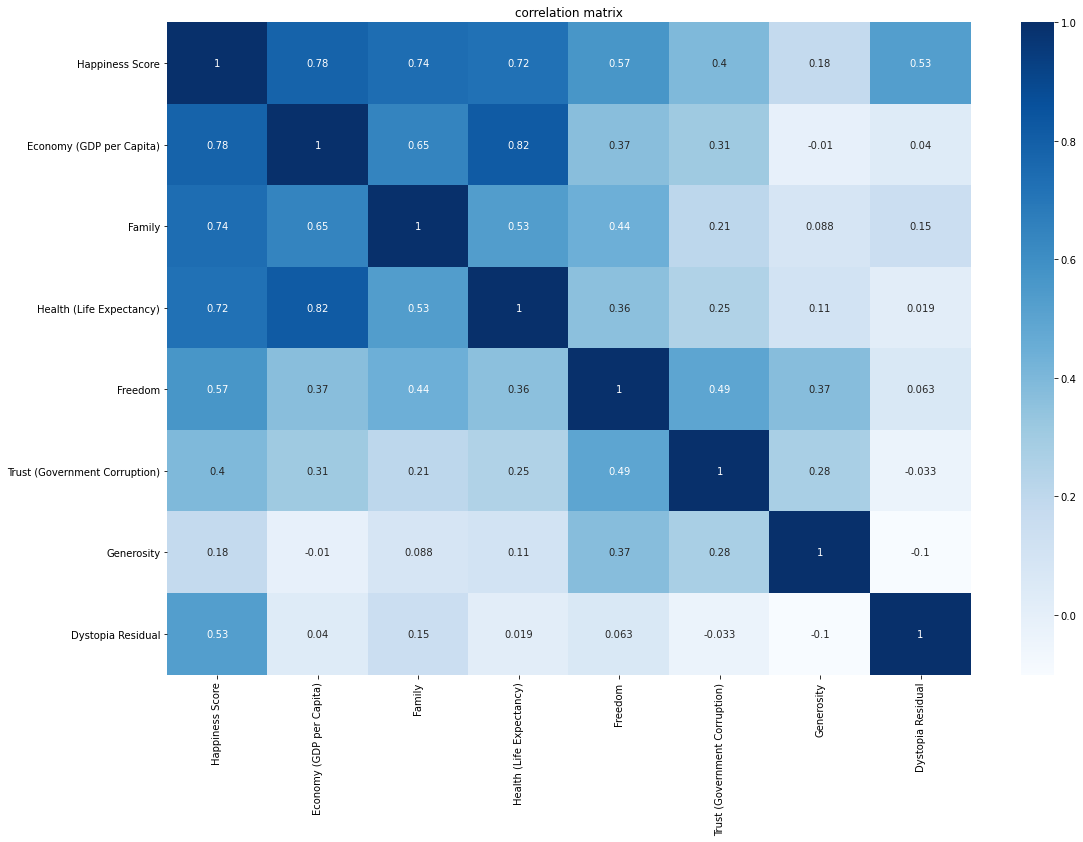

In [9]:
import matplotlib.pyplot as plt
#Multivariate Analysis
fig=plt.figure(figsize=(18,12))
hc=WHR_new.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")
plt.title("correlation matrix")
plt.show()

Happiness Score is heighly corelated with Economy, Family, Health, Freedom and Dystopia.

### DATA CLEANING

In [10]:
WHR_new.describe() #Looking into summary so our data

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Mean and Median i.e. 50% is almost near to each other. By looking at this we can say skewness is not present in data.

75% i.e. third quartile and max values are also near by so there are no outliers

In [11]:
WHR_new.isnull().sum() #Checking for null values

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

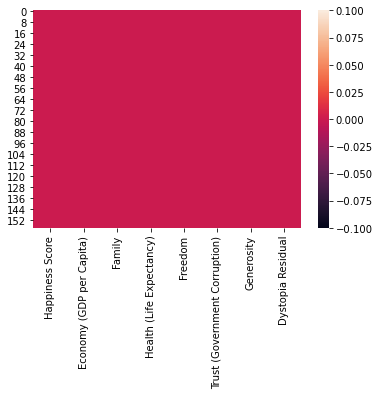

In [12]:
import seaborn as sns
sns.heatmap(WHR_new.isnull()) #Looking for null values if any, in heatmap

No Null values and no missing values

In [13]:
WHR_new.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Here we can clearly see Trust and Generosity are right skewed but they have very less corelation with Happiness score and if we look into mean and median of these columns, we can say they have minor difference. If we will try to remove skewness from this data than our R2_Score may vary. Family is left skewed and have high corelation with Happiness Score but if we see mean and median, we can say there is not much difference in them. Again, If we'll try to remove skewness than R2_Score may Vary. 

### Seprate independent variable and target variable

In [14]:
x=WHR_new.iloc[:,1:]
y=WHR_new.iloc[:,:1]

In [15]:
x.shape

(158, 7)

In [16]:
y.shape

(158, 1)

In [17]:
import numpy as np
y=np.ravel(y)

In [18]:
y.shape

(158,)

### Finding Best Random State

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.9999999642713742  on Random_state  148


### Finding Best Algorithm

In [20]:
#Linear Regression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=148)
LR = LinearRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print("R2 Score:                ", r2_score(y_test,predlr))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,predlr))
print("Mean Squared error:      ", mean_squared_error(y_test,predlr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predlr)))

R2 Score:                 0.9999999642713742
Mean Absolute Error:      0.0002159303664642139
Mean Squared error:       6.439951545835079e-08
Root Mean Squared Error:  0.00025377059612640465


In [21]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score:                ", r2_score(y_test,predrf))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,predrf))
print("Mean Squared error:      ", mean_squared_error(y_test,predrf))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predrf)))

R2 Score:                 0.8576002818543452
Mean Absolute Error:      0.3978216666666669
Mean Squared error:       0.2566701806458332
Root Mean Squared Error:  0.5066262731499751


In [22]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("R2 Score:                ", r2_score(y_test,preddt))
print("Mean Absolute Error:     ", mean_absolute_error(y_test,preddt))
print("Mean Squared error:      ", mean_squared_error(y_test,preddt))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,preddt)))

R2 Score:                 0.7847387264281849
Mean Absolute Error:      0.4719583333333333
Mean Squared error:       0.3880004166666666
Root Mean Squared Error:  0.6228967945548176


Linear Regressoin have highest R2_score value, it's maybe because of overfitting.

To find best algorithm, need to check cross_val_score.

### Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR ,x , y, cv=5)
print("Cross validation score of LinearRegression :",scr.mean())

Cross validation score of LinearRegression : 0.9999981947416543


In [24]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf ,x , y, cv=5)
print("Cross validation score of RandomForestRegressor :",scr.mean())

Cross validation score of RandomForestRegressor : -3.174730289195738


In [25]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt ,x , y, cv=5)
print("Cross validation score of DecisionTreeRegressor :",scr.mean())

Cross validation score of DecisionTreeRegressor : -6.785191225105064


Cross validation of Linear Regression is simillar to it's R2_score. So we'll conclude that Linear Regression have highest accuracy.

### Hyper Parameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept':['bool','default=True'],
             'normalize':['bool','default=True']}

clf = GridSearchCV(LinearRegression(), parameters)
clf.fit(x_train,y_train)
clf.best_params_  #Best parameters

{'fit_intercept': 'bool', 'normalize': 'bool'}

In [27]:
clf_pred = clf.best_estimator_.predict(x_test)

In [28]:
r2_score(y_test, clf_pred)

0.9999999642713742

Our model learnt almost 100% and performing really well

### Saving the model

In [29]:
import joblib
joblib.dump(clf.best_estimator_,"PJ2_WHR.obj")
LR_from_joblib=joblib.load('PJ2_WHR.obj')
LR_from_joblib.predict(x_test)

array([4.19433447, 4.51782997, 6.81023899, 5.01308651, 4.50721032,
       4.27066005, 7.52701562, 6.78620739, 6.79777082, 4.89758603,
       4.07676826, 6.7501175 , 3.8965695 , 3.66725047, 7.22565009,
       5.83272675, 5.98709545, 4.85765674, 5.87828652, 4.56465635,
       7.28598806, 6.93734432, 5.70884036, 6.66966274, 6.29815869,
       2.83893444, 3.68089284, 5.05721715, 3.34000669, 3.67774135,
       3.98884332, 5.8282474 , 3.93080216, 4.86721481, 7.19979203,
       4.30690208, 7.18727821, 3.00632558, 7.27767732, 4.87595952,
       6.26923615, 5.47700252, 4.97112704, 7.5221575 , 3.84497494,
       6.41122303, 6.12273269, 4.33214827])